# 2 Redes neuronales densamente conectadas


In [10]:

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8493626539085016040
]


Precarga de los datos en Keras

In [31]:
from keras.datasets import mnist

# obtenemos los datos para train y test 
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [32]:
print(x_train.ndim) 

3


In [33]:
print(x_train.shape)

(60000, 28, 28)


In [34]:
print(x_train.dtype)

uint8


In [35]:
len (y_train)

60000

1


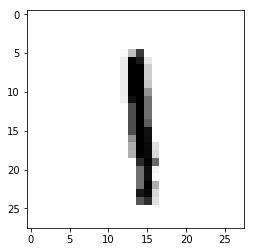

In [36]:
import matplotlib.pyplot as plt
plt.imshow(x_train[8], cmap=plt.cm.binary)
print(y_train[8])

In [37]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255


In [38]:

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)


print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [39]:
from keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

Definición del modelo

In [40]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation

model = Sequential()
model.add(Dense(10, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

Aprendizaje, entrenamiento y evaluación

In [41]:
batch_size = 32
num_classes = 10
epochs=15

model.compile(loss="categorical_crossentropy",optimizer="sgd",metrics = ['accuracy'])

model.fit(x_train, y_train,batch_size=10,epochs=15,verbose=1)

test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

Epoch 1/15
60000/60000 [==============================] - 9s 156us/step - loss: 1.3389 - acc: 0.7240
Epoch 2/15
60000/60000 [==============================] - 9s 148us/step - loss: 0.6331 - acc: 0.8517
Epoch 3/15
60000/60000 [==============================] - 9s 155us/step - loss: 0.4798 - acc: 0.8778
Epoch 4/15
60000/60000 [==============================] - 9s 146us/step - loss: 0.4147 - acc: 0.8908
Epoch 5/15
60000/60000 [==============================] - 10s 160us/step - loss: 0.3781 - acc: 0.8980
Epoch 6/15
60000/60000 [==============================] - 9s 150us/step - loss: 0.3541 - acc: 0.9027
Epoch 7/15
60000/60000 [==============================] - 10s 159us/step - loss: 0.3370 - acc: 0.9067
Epoch 8/15
60000/60000 [==============================] - 9s 154us/step - loss: 0.3237 - acc: 0.9102
Epoch 9/15
60000/60000 [==============================] - 9s 153us/step - loss: 0.3131 - acc: 0.9124
Epoch 10/15
60000/60000 [==============================] - 10s 169us/step - loss: 0.3044 

Predicciones

In [42]:
predictions = model.predict(x_test)

In [43]:
import numpy as np
np.sum(predictions[11])

1.0

In [44]:
np.argmax(predictions[11])

6

In [45]:
# Look at confusion matrix 
#Note, this code is taken straight from the SKLEARN website, an nice way of viewing confusion matrix.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')



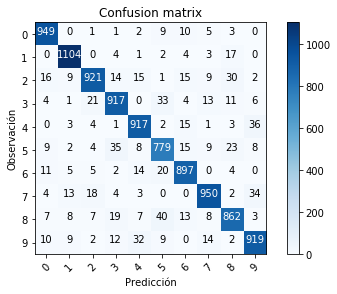

In [46]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools

# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))